In [1]:
import pandas as pd

tao = pd.read_csv(r'.\TAO_2006.csv', header=0)

tao['YYYYMMDD'] = pd.to_datetime(tao['YYYYMMDD'], format='%Y%m%d')

tao['year'] = tao['YYYYMMDD'].dt.year
tao['month'] = tao['YYYYMMDD'].dt.month
tao['day'] = tao['YYYYMMDD'].dt.day
tao.head()

,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q,year,month,day
0,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ,2006,1,1
1,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ,2006,1,1
2,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ,2006,1,1
3,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ,2006,1,1
4,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ,2006,1,1


In [2]:
# 第一问 数据集大小
tao.shape

(35136, 11)

In [3]:
# 第二问 数据集信息
tao.describe()

,Timestamp,HHMMSS,PREC,AIRT,SST,RH,year,month,day
count,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.0,35136.000000,35136.000000
mean,17567.500000,117500.000000,0.191416,27.954269,29.180024,80.056779,2006.0,4.545082,15.643443
std,10143.033866,69243.915221,2.800640,6.549772,4.707549,10.400551,0.0,2.308698,8.823060
min,0.000000,0.000000,-9.990000,-99.900000,-99.900000,-99.900000,2006.0,1.000000,1.000000
25%,8783.750000,58750.000000,-0.020000,27.890000,28.894000,77.200000,2006.0,3.000000,8.000000
50%,17567.500000,117500.000000,-0.010000,28.460000,29.407000,80.200000,2006.0,5.000000,16.000000
75%,26351.250000,176250.000000,0.010000,28.890000,29.802000,83.500000,2006.0,7.000000,23.000000
max,35135.000000,235000.000000,75.770000,31.570000,31.346000,98.100000,2006.0,9.000000,31.000000


In [4]:
# 第三问, 9月最低
tao.groupby(by=['year','month']).count()

Timestamp  YYYYMMDD  HHMMSS  PREC  AIRT   SST    RH     Q   day
year month                                                                 
2006 1           4464      4464    4464  4464  4464  4464  4464  4464  4464
     2           4032      4032    4032  4032  4032  4032  4032  4032  4032
     3           4464      4464    4464  4464  4464  4464  4464  4464  4464
     4           4320      4320    4320  4320  4320  4320  4320  4320  4320
     5           4464      4464    4464  4464  4464  4464  4464  4464  4464
     6           4320      4320    4320  4320  4320  4320  4320  4320  4320
     7           4464      4464    4464  4464  4464  4464  4464  4464  4464
     8           4464      4464    4464  4464  4464  4464  4464  4464  4464
     9            144       144     144   144   144   144   144   144   144

In [5]:
# 第四问，统计包括-9.9，-99.9的行数，一共90行
transdict = {-9.99: -9.99, -99.9: -99.9}
nullines = tao.copy(deep=True)
for i in ['HHMMSS', 'PREC', 'AIRT', 'SST', 'RH']:
    nullines[i] = tao[i].apply(lambda x: transdict.get(x))
nullines.dropna(how='all', inplace=True, subset=['HHMMSS', 'PREC', 'AIRT', 'SST', 'RH'])
nullines.shape

(401, 11)

In [6]:
# 统计得到的有空值的月份
nullines.groupby(by=['year','month']).count()

Timestamp  YYYYMMDD  HHMMSS  PREC  AIRT  SST  RH    Q  day
year month                                                            
2006 1              3         3       0     3     0    0   0    3    3
     3              6         6       0     6     0    0   0    6    6
     4              3         3       0     3     0    0   0    3    3
     6              5         5       0     5     0    0   0    5    5
     7            243       243       0   243    90   46  90  243  243
     8            141       141       0   141     0    0   0  141  141

In [7]:
# 所以无空值的月份为
set(tao['month'])-set(nullines['month'])

{2, 5, 9}

In [8]:
# 删除空值
tao.drop(index=nullines.index,inplace=True)
tao.shape

(34735, 11)

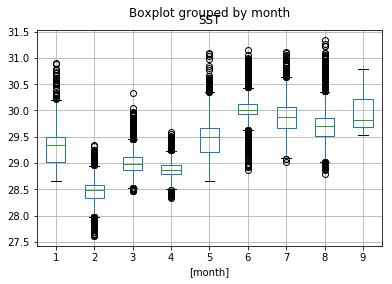

In [9]:
# 第五问 箱线图，结果可以图上看出来
from matplotlib import pyplot as plt
%matplotlib inline
tao.boxplot(column=['SST'],by=['month'],grid=True)
plt.show()

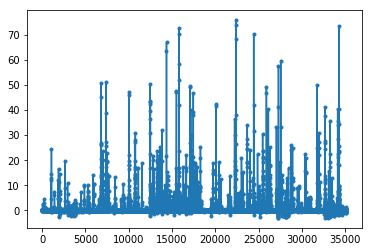

In [10]:
#第六问 降水量折线图，负值应该是异常值需要修改。
plt.plot(tao['Timestamp'], tao['PREC'], marker='.')
plt.show()

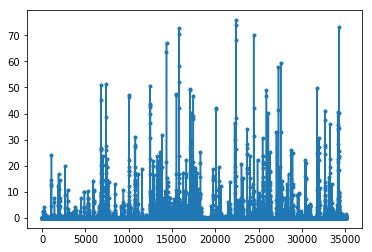

In [11]:
# 修正负值
def norm(x):
    return x if x>=0 else 0
tao['PREC']=tao['PREC'].apply(norm)
plt.plot(tao['Timestamp'], tao['PREC'], marker='.')
plt.show()

In [12]:
# 相关性分析，下面是线形相关系数
cor_data = tao[['PREC', 'AIRT', 'SST', 'RH']]
cor_data.corr()

,PREC,AIRT,SST,RH
PREC,1.000000,-0.303513,-0.034852,0.267698
AIRT,-0.303513,1.000000,0.366119,-0.795451
SST,-0.034852,0.366119,1.000000,-0.456037
RH,0.267698,-0.795451,-0.456037,1.000000


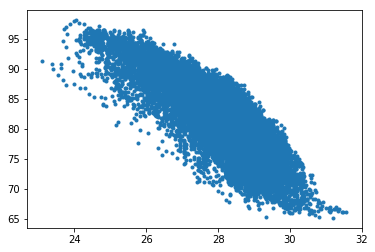

In [13]:
# 空气温度和相对湿度的关系，相关性很强
plt.scatter(tao['AIRT'], tao['RH'], marker='.')
plt.show()

In [14]:
# 8 预测
X = tao[['PREC', 'AIRT', 'SST', 'RH']]  #提取要分类的特征。一般可以通过最大熵原理进行特征选择
y = tao['Q']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# 训练集测试集分割，数据标准化
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)  # 将数据进行分割



# 使用决策树对测试数据进行类别预测 因为特征都是数值型的，不需要进行转化
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

In [15]:
# 获取结果报告
from sklearn.metrics import classification_report
print('Accracy:',dtc.score(X_test,y_test))
print(classification_report(y_predict,y_test,target_names=['died','servived']))

Accracy: 0.9873316594384843
              precision    recall  f1-score   support

        died       0.99      0.99      0.99      8672
    servived       0.38      0.38      0.38        90

   micro avg       0.99      0.99      0.99      8762
   macro avg       0.69      0.69      0.69      8762
weighted avg       0.99      0.99      0.99      8762



In [15]:
# 混淆矩阵 模型的结果还可以
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, dtc.predict(X_train))

array([[26031,     0],
       [    0,    20]], dtype=int64)

In [16]:
# 9 湿度对天数的线性模型
# 先按天数统计湿度中位数
rh_data = tao.groupby(by=['YYYYMMDD']).median()
from sklearn.linear_model import LinearRegression
import numpy as np
linear_model = LinearRegression()
X, y = np.c_[(list(range(1,len(rh_data['RH'])+1)))], np.c_[rh_data['RH']]
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

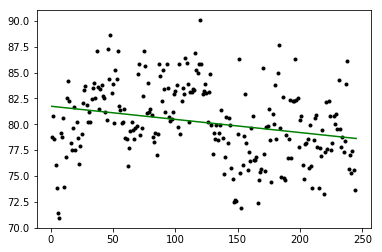

In [17]:
# 可视化结果，绿色的是线性回归拟合的结果，黑色的点是湿度数据，横轴为天数
X2 = [[1], [len(rh_data['RH'])+1]]
y2 = linear_model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

In [18]:
# 预测9月2日数据
linear_model.predict([[len(rh_data['RH'])+2]])

array([[78.61249619]])

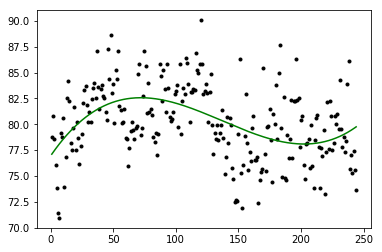

In [19]:
# 这个模型不好，从上图可以看出湿度和日期是没有很强的相关性的，线性模型不适合。
# 更好的模型就是用AR模型处理时序数据，这里结合课本内容选三次多项式拟合

from sklearn.preprocessing import  PolynomialFeatures
poly_reg =PolynomialFeatures(degree=3)
X_ploy =poly_reg.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_ploy,y)

plt.plot(X, y, 'k.')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), 'g-')
plt.show()

In [20]:
# 新模型9月2日预测湿度
lin_reg_2.predict(poly_reg.fit_transform([[len(rh_data['RH'])+2]]))

array([[79.9288883]])

In [21]:
# 10 填充缺失值，使用三次多项式拟合的方法,先训练模型
X, y = np.c_[tao['Timestamp']], np.c_[tao['RH']]
poly_reg =PolynomialFeatures(degree=3)
X_ploy =poly_reg.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_ploy,y)

# 再填充空值，使用第四问中保存的空值行
nullines['RH']=nullines['Timestamp'].apply(lambda x:lin_reg_3.predict(poly_reg.fit_transform([[x]]))[0][0])

In [22]:
nullines[['Timestamp','RH']]

,Timestamp,RH
1411,1411,78.888439
1412,1412,78.889427
1413,1413,78.890414
12475,12475,82.645290
12476,12476,82.645146
12477,12477,82.645002
12562,12562,82.632524
12563,12563,82.632374
12564,12564,82.632225
16975,16975,81.533553


In [23]:
tao.shape

(34735, 11)

In [24]:
# 将插值后的数据合并回tao数据集中，可以看到多了401行数据。
tao = tao.append(nullines)
# 将数据按Timestamp 排序，保持数据形式和初始一致
tao = tao.sort_values('Timestamp')
tao.shape

(35136, 11)